# Logistic Regression


In this notebook you will learn:
1. What is a logistic regression
2. How to train a logistic regression model
3. How to evaluate the performance of a classification model your model
4. How to interpret a Logistic Regression's weights
5. How to visualize its decision boundaries in 2D

1. **Linear Regression Model**: 
   The initial model for predicting a probability $p$ using a linear combination of features $ x_1, x_2, \ldots $ with weights $ w_0, w_1, w_2, \ldots $ is given by:
   $$ p = w_0 + w_1 x_1 + w_2 x_2 + \cdots $$

2. **Modifying the Model**: 
   To adjust the range of the model's output to $(0, 1)$, we model the odds $ \frac{p}{1 - p}$, where the domain becomes $( \mathbb{R}^+ )$:
   $$ \frac{p}{1 - p} = w_0 + w_1 x_1 + w_2 x_2 + \cdots $$

3. **Log Transformation**: 
   Taking the logarithm of the odds to spread the range to $(- \infty, + \infty)$, we have:
   
   $$ \log \left( \frac{p}{1 - p} \right) = w_0 + w_1 x_1 + w_2 x_2 + \cdots $$

4. **Solving for \( p \)**: 
   Finally, solving this equation for $p$ to get the logistic (sigmoid) function:
   
   $$
   \begin{align*}
   \log \left( \frac{p}{1 - p} \right) &= w_0 + w_1 x_1 + w_2 x_2 + \cdots \\ \\
   \frac{p}{1 - p} &= e^{w_0 + w_1 x_1 + w_2 x_2 + \cdots} \\
   p &= \frac{e^{w_0 + w_1 x_1 + w_2 x_2 + \cdots}}{1 + e^{w_0 + w_1 x_1 + w_2 x_2 + \cdots}} \\
   p &= \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2 + \cdots)}}
   \end{align*}
   $$


This is also called the sigmoid function:

$$\text{Sigmoid}(z) = \frac{1}{1 + e^{-(z)}} \quad \text{,where} \quad z = w_0 + w_1 x_1 + w_2 x_2 + \cdots$$
<br>

The sigmoid function receives any input $x \in ]-\infty, +\infty[$ and \"squashes\" it down to the $]0, 1[$ interval:
<div style="text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1400/1*a04iKNbchayCAJ7-0QlesA.png" alt="Description of Image" width="500" style="display: block; margin-left: auto; margin-right: auto;"/>
</div>




# And that sums it up!

Now don't get too afraid of all this math, you don't need to know these details in practice

<div style="text-align: center;">
    <img src="https://i.imgflip.com/98fl3m.jpg" alt="Description of Image" width="500" style="display: block; margin-left: auto; margin-right: auto;"/>
</div>

## Why Logistic Regression

1. Simple model
2. Good interpretation of the coefficients
3. Computationally efficient
4. Low risk of overfitting
5. Great baseline model for classification

# Imports

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Some function we will use later

In [2]:
def plot_decision_boundary(feature_a : pd.Series,
                           feature_b : pd.Series,
                           target : pd.Series,
                           threshold : float = 0.5
                          ):

    X = pd.concat([feature_a,feature_b],axis=1)
    model = LogisticRegression()
    model.fit(X,target)

    xx, yy = np.meshgrid(np.linspace(feature_a.min() - 1, feature_a.max() +1, 100), 
                         np.linspace(feature_b.min()-1, feature_b.max()+1, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
    plt.contourf(xx, yy, probs, levels=[0, threshold, 1], cmap='coolwarm', alpha=0.8)
    plt.scatter(feature_a, feature_b, c=target, edgecolors='k', marker='o', s=50)
    plt.xlabel(f'{feature_a.name}')
    plt.ylabel(f'{feature_b.name}')
    plt.title('Decision Boundary of the Logistic Regression')
    plt.show()

# Load the data

In [3]:
# Load the iris dataset from scikit-learn
iris = load_iris()

# Create a DataFrame from the features and target variable
df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
df['target'] = [ iris['target_names'][i] for i in iris['target']]

In [4]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [5]:
df.shape

(150, 5)

## Documentation about the data

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

# Let's keep it simple

There are 3 types of plants but we just want to classify if a given plant is `Iris-Setosa` or `Iris-Versicolour`. So let's remove data related to `Iris-Virginica`.

In [7]:
# removing rows associated with the plant we are not interested in
df_preprocessed = df[df.target != 'virginica']

In [8]:
df_preprocessed.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
df_preprocessed.shape

(100, 5)

# Train a model

1st we have to decide what will be our positive class (1) and what will be our negative class (0)

- **Positive class**: Iris-Setosa
- **Negative class**: Iris-Versicolour

Now for the model to understand these targets we have to actually encode them as either 0 or 1:

In [13]:
df_preprocessed.loc[:,'target'] = df_preprocessed.loc[:,'target'].replace({'setosa':1.0,'versicolor':0.0})

In [14]:
df_preprocessed.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0
2,4.7,3.2,1.3,0.2,1.0


Awesome! We are ready to train a Logistic Regression

In [15]:
X = df_preprocessed[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df_preprocessed['target'].astype(float)

In [16]:
model = LogisticRegression()

model.fit(X,y)

LogisticRegression()

In [17]:
preds = model.predict(X)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

![](../media/7ysypz.jpg)

And you would be right! model.predict here is actually doing a couple of steps under the hood:

First it outputs the probabilities by passing the inputs through the **sigmoid** function

In [18]:
probas = model.predict_proba(X)[:,1]
probas

array([0.98395142, 0.97701191, 0.98593614, 0.97682364, 0.98594633,
       0.96961041, 0.98445958, 0.97891909, 0.97973186, 0.97600103,
       0.9808288 , 0.97575424, 0.97995345, 0.99185207, 0.99120468,
       0.9858973 , 0.98770916, 0.98236266, 0.96565076, 0.98306946,
       0.96085555, 0.97966159, 0.99527478, 0.95042431, 0.95267181,
       0.96244757, 0.96817372, 0.97898149, 0.98167858, 0.9722716 ,
       0.96839778, 0.96983396, 0.98881828, 0.98981164, 0.97364629,
       0.98724738, 0.98480153, 0.98775895, 0.98522619, 0.9779936 ,
       0.98654408, 0.96845025, 0.98765055, 0.96490405, 0.95442751,
       0.97581217, 0.98067117, 0.98309273, 0.9816373 , 0.98162404,
       0.00312893, 0.00585489, 0.00171136, 0.01462396, 0.00310121,
       0.00670214, 0.00384271, 0.12439458, 0.00393504, 0.02711176,
       0.05621881, 0.01208124, 0.01430512, 0.00353577, 0.05811679,
       0.00649476, 0.00692948, 0.01942486, 0.00258538, 0.02534236,
       0.00274317, 0.01764371, 0.00129184, 0.00391076, 0.00854

Then it makes a decision about what class this probability falls into by placing a decision threshold:

In [ ]:
decision_threshold = # what should we use here?

In [25]:
preds = (probas > 0.5).astype(int)

In [26]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

----

So, is our model correct?

In [27]:
accuracy = (preds == y).sum() / len(y)

In [28]:
accuracy

1.0

![](../media/7yusqp.jpg)

# Visualizing the model

/Users/simaonovais/miniconda3/envs/MLCatolica24/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


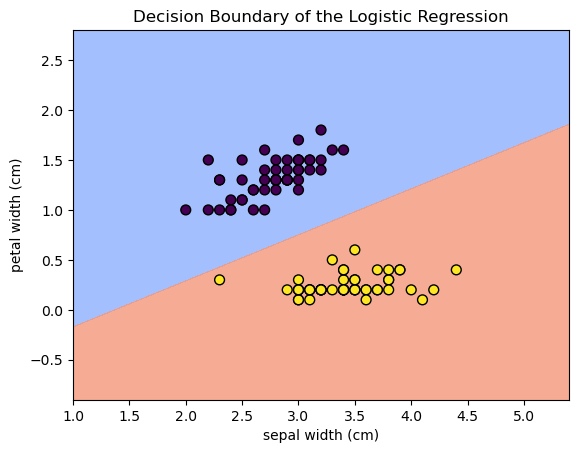

In [29]:
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.5)

# Can we interpret a Logistic Regression Model?

We know how to compute the probabilities for any given example: 

$$ p = \frac{1}{1 + e^{-(\beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b)}}$$


But remind that:

$$ 
\begin{equation}\begin{aligned}\beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b &= \log \frac{p}{1-p} \\
&= \log odds \end{aligned} \end{equation}$$

This means that the log odds is linear on the model parameters $\beta_i$. As such, like in Linear Regression, each $\beta_i$ each represents the change in $\log odds$  for a unit change in $x_i$.

In [30]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [31]:
model.coef_

array([[-0.43911437,  0.90851188, -2.30934933, -0.96013607]])

These coeficients help us understand how the model is making its decisions. For our case:
1. a unit change in `sepal length` makes it more likely to be **iris-versicolor**
2. a unit change in `sepal width` makes it more likely to be **iris-setosa**
3. a unit change in `petal length` makes it a lot more likely to be **iris-versicolor**
4. a unit change in `petal width` makes it more likely to be **iris-versicolor**

$ \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b = A$ has a nice interpretation because it defines the decision threshold plane.

A new input is classified as class 1 if $ \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +b > A$ or class 0 otherwise.

Choosing a threshold of 0.5 probability is the same as saying $A = \log \frac{0.5}{1-0.5} = 0$

/Users/simaonovais/miniconda3/envs/MLCatolica24/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


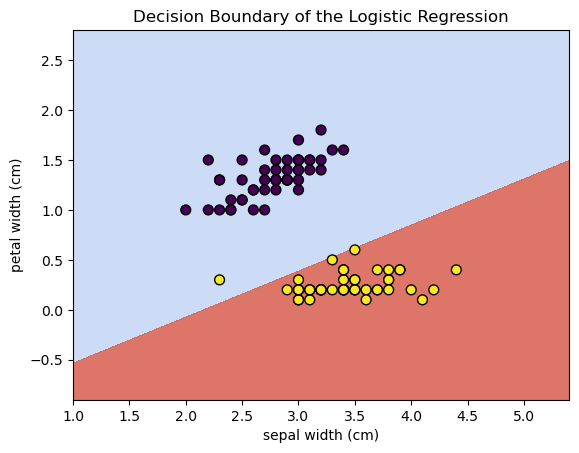

In [32]:
# so for for a threshold of 0.8 for example we get
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.8)

/Users/simaonovais/miniconda3/envs/MLCatolica24/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


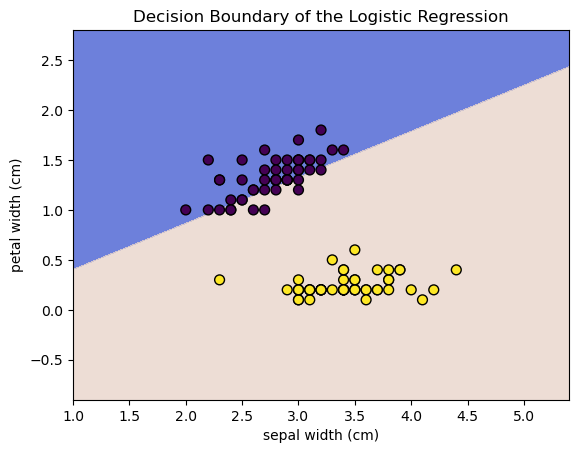

In [33]:
# so for for a threshold of 0.1 for example we get
plot_decision_boundary(feature_a = X['sepal width (cm)'],
                       feature_b = X['petal width (cm)'],
                       target = y, 
                       threshold = 0.1)

And that's it, you've reached the end of the lesson!

![](../media/7yvj5n.jpg)